In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns 
%matplotlib inline 
from scipy import stats


In [2]:
file_path = 'Flight_Fare.xlsx'

In [3]:
data = pd.read_excel(file_path)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
data.head(10)

Airline Date_of_Journey    Source Destination  \
0             IndiGo      24/03/2019  Banglore   New Delhi   
1          Air India       1/05/2019   Kolkata    Banglore   
2        Jet Airways       9/06/2019     Delhi      Cochin   
3             IndiGo      12/05/2019   Kolkata    Banglore   
4             IndiGo      01/03/2019  Banglore   New Delhi   
5           SpiceJet      24/06/2019   Kolkata    Banglore   
6        Jet Airways      12/03/2019  Banglore   New Delhi   
7        Jet Airways      01/03/2019  Banglore   New Delhi   
8        Jet Airways      12/03/2019  Banglore   New Delhi   
9  Multiple carriers      27/05/2019     Delhi      Cochin   

                   Route Dep_Time  Arrival_Time Duration Total_Stops  \
0              BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h     2 stops   
3        CCU → NAG → BLR    18:05         23:30   5h 25m      1 stop   
4        BLR → NAG → DEL    16:50         21:35   4h 45m      1 stop   
5              CCU → BLR    09:00         11:25   2h 25m    non-stop   
6        BLR → BOM → DEL    18:55  10:25 13 Mar  15h 30m      1 stop   
7        BLR → BOM → DEL    08:00  05:05 02 Mar   21h 5m      1 stop   
8        BLR → BOM → DEL    08:55  10:25 13 Mar  25h 30m      1 stop   
9        DEL → BOM → COK    11:25         19:15   7h 50m      1 stop   

               Additional_Info  Price  
0                      No info   3897  
1                      No info   7662  
2                      No info  13882  
3                      No info   6218  
4                      No info  13302  
5                      No info   3873  
6  In-flight meal not included  11087  
7                      No info  22270  
8  In-flight meal not included  11087  
9                      No info   8625

In [6]:
data.shape

(10683, 11)

In [7]:
data.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [8]:
data.describe().T

count         mean          std     min     25%     50%      75%  \
Price  10683.0  9087.064121  4611.359167  1759.0  5277.0  8372.0  12373.0   

           max  
Price  79512.0

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [10]:
data['Duration'].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA

In [13]:
from datetime import datetime, timedelta


In [14]:
print(data.Date_of_Journey.head())


0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object


In [15]:
data["Journey_day"] = pd.to_datetime(data.Date_of_Journey, format="%d/%m/%Y", errors='coerce').dt.day


In [16]:
data["Journay_month"]=pd.to_datetime(data["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [17]:
data.drop(['Date_of_Journey'], axis=1, inplace = True)

In [18]:
data

Airline    Source Destination                  Route Dep_Time  \
0           IndiGo  Banglore   New Delhi              BLR → DEL    22:20   
1        Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR    05:50   
2      Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK    09:25   
3           IndiGo   Kolkata    Banglore        CCU → NAG → BLR    18:05   
4           IndiGo  Banglore   New Delhi        BLR → NAG → DEL    16:50   
...            ...       ...         ...                    ...      ...   
10678     Air Asia   Kolkata    Banglore              CCU → BLR    19:55   
10679    Air India   Kolkata    Banglore              CCU → BLR    20:45   
10680  Jet Airways  Banglore       Delhi              BLR → DEL    08:20   
10681      Vistara  Banglore   New Delhi              BLR → DEL    11:30   
10682    Air India     Delhi      Cochin  DEL → GOI → BOM → COK    10:55   

       Arrival_Time Duration Total_Stops Additional_Info  Price  Journey_day  \
0      01:10 22 Mar   2h 50m    non-stop         No info   3897           24   
1             13:15   7h 25m     2 stops         No info   7662            1   
2      04:25 10 Jun      19h     2 stops         No info  13882            9   
3             23:30   5h 25m      1 stop         No info   6218           12   
4             21:35   4h 45m      1 stop         No info  13302            1   
...             ...      ...         ...             ...    ...          ...   
10678         22:25   2h 30m    non-stop         No info   4107            9   
10679         23:20   2h 35m    non-stop         No info   4145           27   
10680         11:20       3h    non-stop         No info   7229           27   
10681         14:10   2h 40m    non-stop         No info  12648            1   
10682         19:15   8h 20m     2 stops         No info  11753            9   

       Journay_month  
0                  3  
1                  5  
2                  6  
3                  5  
4                  3  
...              ...  
10678              4  
10679              4  
10680              4  
10681              3  
10682              5  

[10682 rows x 12 columns]

In [19]:
# Extracting hours
data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour

# Extracting Minutes
data["Dep_min"]= pd.to_datetime(data["Dep_Time"]).dt.minute

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\3588194878.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_hour"]=pd.to_datetime(data["Dep_Time"]).dt.hour
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\3588194878.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Dep_min"]= pd.to_datetime(data["Dep_Time"]).dt.minute


In [20]:
# Now we can drop Dep_Time as it is of no use
data.drop(["Dep_Time"], axis=1, inplace=True)

In [21]:
data.head()


Airline    Source Destination                  Route  Arrival_Time  \
0       IndiGo  Banglore   New Delhi              BLR → DEL  01:10 22 Mar   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR         13:15   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK  04:25 10 Jun   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR         23:30   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL         21:35   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journay_month  \
0   2h 50m    non-stop         No info   3897           24              3   
1   7h 25m     2 stops         No info   7662            1              5   
2      19h     2 stops         No info  13882            9              6   
3   5h 25m      1 stop         No info   6218           12              5   
4   4h 45m      1 stop         No info  13302            1              3   

   Dep_hour  Dep_min  
0        22       20  
1         5       50  
2         9       25  
3        18        5  
4        16       50

In [22]:
# Arrival time is when the plane pulls up to the gate
#Similarly to Date_of_Journey we can extract valuesfrom Arrival_Time

#Extracting Hours
data["Arrival_hour"] =pd.to_datetime(data.Arrival_Time).dt.hour

#Extracting Mintutes
data["Arrival_min"]= pd.to_datetime(data.Arrival_Time).dt.minute

data.drop(["Arrival_Time"], axis=1, inplace=True)

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\505772329.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_hour"] =pd.to_datetime(data.Arrival_Time).dt.hour
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\505772329.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Arrival_min"]= pd.to_datetime(data.Arrival_Time).dt.minute


In [23]:
data.head()

Airline    Source Destination                  Route Duration  \
0       IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK      19h   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR   5h 25m   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL   4h 45m   

  Total_Stops Additional_Info  Price  Journey_day  Journay_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   
2     2 stops         No info  13882            9              6         9   
3      1 stop         No info   6218           12              5        18   
4      1 stop         No info  13302            1              3        16   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15  
2       25             4           25  
3        5            23           30  
4       50            21           35

In [24]:
# Ensure the Duration column is a list
duration = list(data["Duration"])

# Fix missing components in duration strings
for i in range(len(duration)):
    if len(duration[i].split()) != 2: 
        if "h" in duration[i]:  # Add "0m" if minutes are missing
            duration[i] = duration[i].strip() + " 0m"
        else:  # Add "0h" if hours are missing
            duration[i] = "0h " + duration[i]

# Extract hours and minutes from duration strings
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    # Extract hours
    duration_hours.append(int(duration[i].split(sep="h")[0].strip()))
    # Extract minutes
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1].strip()))

# Add extracted values to the DataFrame
data["Duration_hours"] = duration_hours
data["Duration_mins"] = duration_mins


In [25]:
data.drop(['Duration'], axis =1 , inplace = True)

In [26]:
data.head()

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   
3       IndiGo   Kolkata    Banglore        CCU → NAG → BLR      1 stop   
4       IndiGo  Banglore   New Delhi        BLR → NAG → DEL      1 stop   

  Additional_Info  Price  Journey_day  Journay_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   
3         No info   6218           12              5        18        5   
4         No info  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0  
3            23           30               5             25  
4            21           35               4             45

# Handling Categorical Data

In [27]:
data["Airline"].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [28]:
Airline=data[["Airline"]]
Current_Airline_list=Airline['Airline']
New_Airline_list=[]

for carrier in Current_Airline_list:
    if carrier in ['Jet Airways','Air India','IndiGo','SpiceJet','Vistara','Air Asia','GoAir','Multiple carriers ']:
        New_Airline_list.append(carrier)
    else:
         New_Airline_list.append('Other')

    Airline['Airline']=pd.DataFrame(New_Airline_list)
    Airline['Airline'].value_counts()
        

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['Airline']=pd.DataFrame(New_Airline_list)
C:\Users\Rucha\AppData\Local\Temp\ipykernel_34112\241540623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

In [29]:

Airline = pd.get_dummies(Airline, drop_first=True)

Airline= Airline.astype(int)

In [30]:
Airline.head()

Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Other  Airline_SpiceJet  Airline_Vistara  
0              0                 0                0  
1              0                 0                0  
2              0                 0                0  
3              0                 0                0  
4              0                 0                0

In [31]:
data["Source"].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

C:\Users\Rucha\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


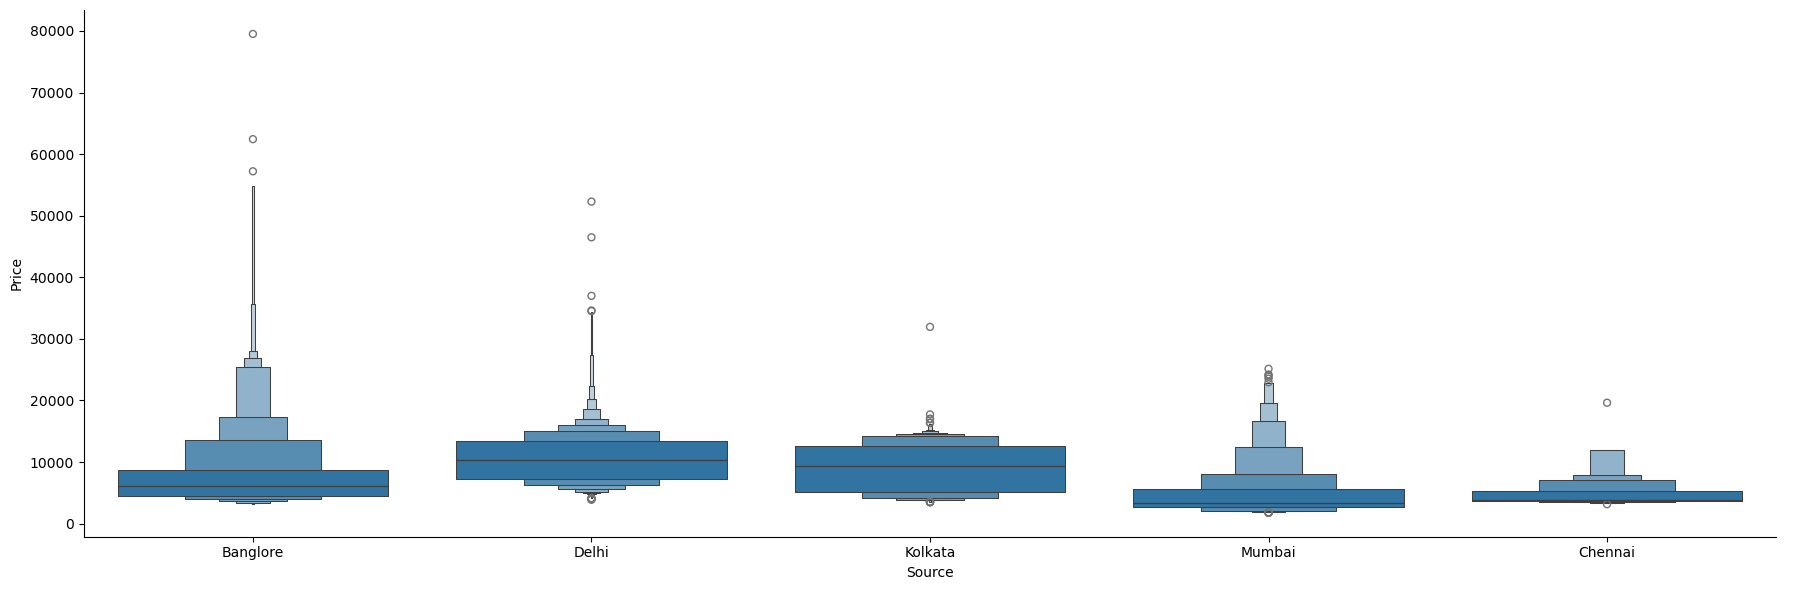

In [32]:
# Source vs price 
sns.catplot(y="Price", x = "Source", data=data.sort_values("Price",ascending=False),kind="boxen", 
    height=6, 
    aspect=3)

In [33]:
Source= data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source= Source.astype(int)

In [34]:
Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [35]:
data["Destination"].value_counts()

Destination
Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [36]:
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination,drop_first= True)

Destination = Destination.astype(int)

In [37]:
Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [38]:
data.drop(["Route","Additional_Info"], axis = 1, inplace=True)

In [39]:
data["Total_Stops"].value_counts()

Total_Stops
1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: count, dtype: int64

In [40]:
data.replace({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4}, inplace= True)

In [41]:
data.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journay_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [42]:
data_train=pd.concat([data,Airline,Source,Destination],axis=1)

In [43]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [44]:
data_train.head()

Total_Stops  Price  Journey_day  Journay_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Other  Airline_SpiceJet  Airline_Vistara  Source_Chennai  \
0              0                 0                0               0   
1              0                 0                0               0   
2              0                 0                0               0   
3              0                 0                0               0   
4              0                 0                0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1

In [45]:
data_train.shape

(10682, 26)

## Feature Selection

In [46]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journay_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Other', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [47]:
X=data_train.loc[:,['Total_Stops', 'Price', 'Journey_day', 'Journay_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Other', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

Total_Stops  Price  Journey_day  Journay_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  \
0             1           10               2             50   
1            13           15               7             25   
2             4           25              19              0   
3            23           30               5             25   
4            21           35               4             45   

   Airline_Air India  Airline_GoAir  Airline_IndiGo  Airline_Jet Airways  \
0                  0              0               1                    0   
1                  1              0               0                    0   
2                  0              0               0                    1   
3                  0              0               1                    0   
4                  0              0               1                    0   

   Airline_Other  Airline_SpiceJet  Airline_Vistara  Source_Chennai  \
0              0                 0                0               0   
1              0                 0                0               0   
2              0                 0                0               0   
3              0                 0                0               0   
4              0                 0                0               0   

   Source_Delhi  Source_Kolkata  Source_Mumbai  Destination_Cochin  \
0             0               0              0                   0   
1             0               1              0                   0   
2             1               0              0                   1   
3             0               1              0                   0   
4             0               0              0                   0   

   Destination_Delhi  Destination_Hyderabad  Destination_Kolkata  \
0                  0                      0                    0   
1                  0                      0                    0   
2                  0                      0                    0   
3                  0                      0                    0   
4                  0                      0                    0   

   Destination_New Delhi  
0                      1  
1                      0  
2                      0  
3                      0  
4                      1

In [48]:
y = data_train.iloc[:,1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [49]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

print(selection.feature_importances_)


[1.56326702e-01 6.52180676e-01 3.42566627e-03 2.33343677e-03
 2.14632343e-04 1.39576322e-04 3.64898686e-04 2.02925409e-04
 7.57216471e-02 2.45968609e-04 1.34452233e-03 3.00720760e-05
 2.34206669e-03 7.07855028e-02 2.95554893e-03 1.32440113e-04
 1.58330351e-04 4.79653017e-05 6.41986758e-03 4.87634263e-04
 1.90664607e-03 5.44109294e-03 9.61314998e-03 9.57881599e-04
 4.98095531e-05 6.17133979e-03]


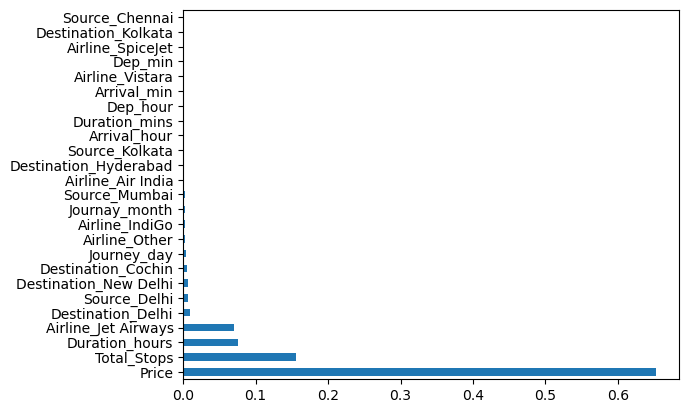

In [50]:
import pandas as pd
import matplotlib.pyplot as plt


feat_importances = pd.Series(selection.feature_importances_, index=X.columns)

feat_importances.nlargest(25).plot(kind='barh')

plt.show()


# Model Training


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor()

# model performance

In [53]:
print('Model Performance on Training Set:', round(reg_rf.score(X_train, y_train)*100,2)) 
print('Model Performance on Test Sets:', round(reg_rf.score(X_test, y_test)*100,2))

Model Performance on Training Set: 99.95
Model Performance on Test Sets: 99.95


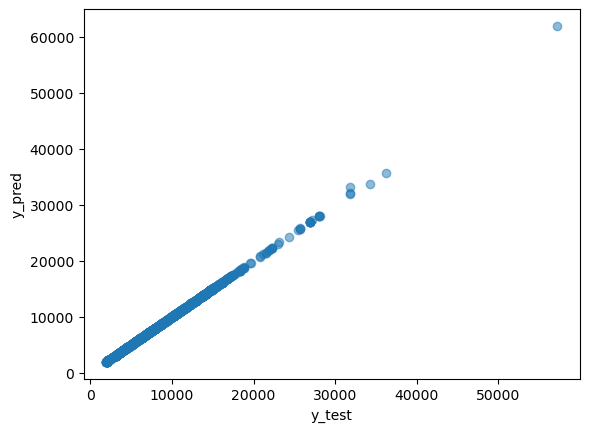

In [54]:
#Plot performance graph

y_pred = reg_rf.predict(X_test)

plt.scatter(y_test, y_pred, alpha= 0.5)

plt.xlabel("y_test")

plt.ylabel("y_pred")

plt.show()

In [55]:
from sklearn import metrics
import numpy as np

print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) 

print('MSE:', metrics.mean_squared_error(y_test, y_pred))  

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

normalized_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred)) / (max(y_test) - min(y_test))
print('Normalized RMSE:', round(normalized_rmse, 2)) 

print('Max Value:', max(y_test), '\nMin Value:', min(y_test))


MAE: 5.158376228357519
MSE: 11435.763937622825
RMSE: 106.93813135464275
Normalized RMSE: 0.0
Max Value: 57209 
Min Value: 1965


In [56]:
import pickle
from sklearn.ensemble import RandomForestRegressor

# Train the model (just an example, replace with your actual model training code)
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

# Save the trained model to a file using pickle
with open('c2_flight_rf.pkl', 'wb') as file:
    pickle.dump(reg_rf, file)

print("Model saved to 'c2_flight_rf.pkl'")


Model saved to 'c2_flight_rf.pkl'


In [57]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_pred = lr_model.predict(X_test)

# Calculate evaluation metrics for Linear Regression
lr_r2 = round(metrics.r2_score(y_test, lr_pred), 2)
lr_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)), 2)
lr_normalized_rmse = round(lr_rmse / (max(y_test) - min(y_test)), 2)

# Print evaluation for Linear Regression
print("Linear Regression Performance:")
print(f'R²: {lr_r2}')
print(f'RMSE: {lr_rmse}')
print(f'Normalized RMSE: {lr_normalized_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


Linear Regression Performance:
R²: 1.0
RMSE: 0.0
Normalized RMSE: 0.0
Max Value: 57209
Min Value: 1965


In [ ]:
import xgboost as xgb
from sklearn import metrics
import numpy as np

# Initialize and train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xg_reg.fit(X_train, y_train)

# Make predictions on the test set
xg_pred = xg_reg.predict(X_test)

# Calculate evaluation metrics for XGBoost
xg_r2 = round(metrics.r2_score(y_test, xg_pred), 2)
xg_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, xg_pred)), 2)
xg_normalized_rmse = round(xg_rmse / (max(y_test) - min(y_test)), 2)

# Print evaluation for XGBoost
print("\nXGBoost Performance:")
print(f'R²: {xg_r2}')
print(f'RMSE: {xg_rmse}')
print(f'Normalized RMSE: {xg_normalized_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')


In [ ]:
# 3. Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Calculate evaluation metrics for Random Forest
rf_r2 = round(metrics.r2_score(y_test, rf_pred), 2)
rf_rmse = round(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)), 2)
rf_normalized_rmse = round(rf_rmse / (max(y_test) - min(y_test)), 2)

# Print evaluation for Random Forest
print("\nRandom Forest Performance:")
print(f'R²: {rf_r2}')
print(f'RMSE: {rf_rmse}')
print(f'Normalized RMSE: {rf_normalized_rmse}')
print(f'Max Value: {max(y_test)}\nMin Value: {min(y_test)}')

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [ ]:
# Model Training with Hyperparameter Tuning
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_params_

In [ ]:
# Plot Performance Chart
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [ ]:
# RMSE/(max(DV)-min(DV))
print('R2 value: ', round(metrics.r2_score(y_test, prediction),2))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_test), '\nMin Value: ', min(y_test))

# Model performance report

# Best Model

# Challenges Faced